In [1]:
import uproot 
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tree = uproot.open("givenfile.root:Events")

In [3]:
events =  tree.arrays(library = "ak", how = "zip")

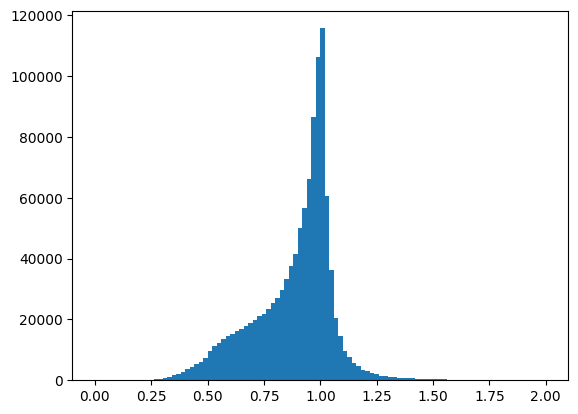

In [4]:
photons = events.Photon
r9=np.array(ak.flatten(photons.r9))
plt.hist(r9,bins=100,range=(0,2))
plt.show()

In [4]:
events = events[((events.HLT_Ele35_WPTight_Gsf ==1) | (events.HLT_Ele35_WPTight_Gsf_L1EGMT ==1))]

In [5]:
photons = events.Photon

In [6]:
photons = photons[(photons.electronVeto == False) & (photons.pt > 25) & ((photons.eta < 1.44) | (photons.eta > 1.55))]

In [7]:
photons.fields

['seediEtaOriX',
 'cutBased',
 'electronVeto',
 'hasConversionTracks',
 'isScEtaEB',
 'isScEtaEE',
 'mvaID_WP80',
 'mvaID_WP90',
 'pixelSeed',
 'seedGain',
 'electronIdx',
 'jetIdx',
 'seediPhiOriY',
 'vidNestedWPBitmap',
 'ecalPFClusterIso',
 'energyErr',
 'energyRaw',
 'esEffSigmaRR',
 'esEnergyOverRawE',
 'eta',
 'etaWidth',
 'haloTaggerMVAVal',
 'hcalPFClusterIso',
 'hoe',
 'hoe_PUcorr',
 'mvaID',
 'pfChargedIso',
 'pfChargedIsoPFPV',
 'pfChargedIsoWorstVtx',
 'pfPhoIso03',
 'pfRelIso03_all_quadratic',
 'pfRelIso03_chg_quadratic',
 'phi',
 'phiWidth',
 'pt',
 'r9',
 's4',
 'sieie',
 'sieip',
 'sipip',
 'superclusterEta',
 'trkSumPtHollowConeDR03',
 'trkSumPtSolidConeDR04',
 'x_calo',
 'y_calo',
 'z_calo']

In [8]:
ak.count(ak.flatten(photons.pt))

187383

In [9]:
pt = np.array(ak.flatten(photons.pt))
np.save("pt_arr.npy",pt)

In [10]:
pt.shape

(187383,)

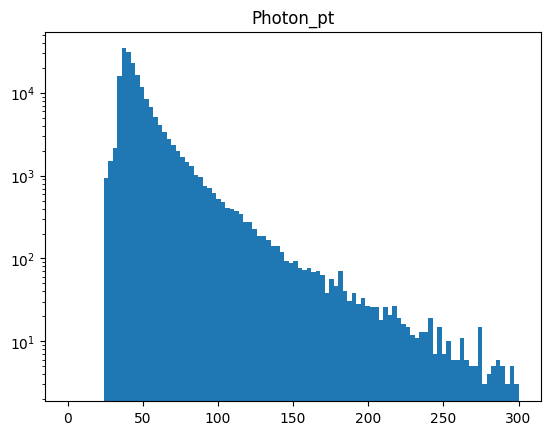

In [11]:
plt.hist(pt,bins = 100,range = (0,300) )
plt.title("Photon_pt")
plt.yscale("log")
plt.savefig("photon_pt.pdf")
plt.show()


In [12]:
mva = np.array(ak.flatten(photons.eta))
np.save("arr_mva.npy",mva)

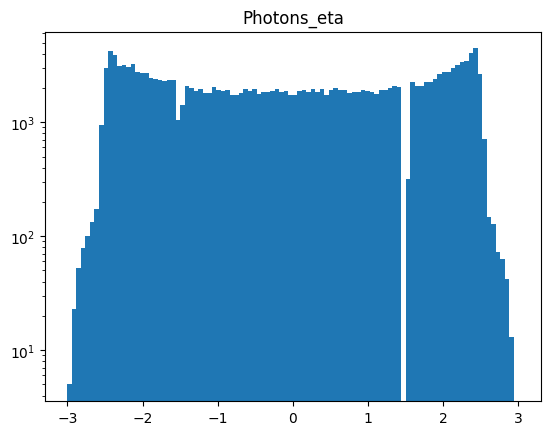

In [13]:
plt.hist(mva,bins = 100,range = (-3,3) )
plt.title("Photons_eta")
plt.yscale("log")
plt.savefig("eta.pdf")
plt.show()


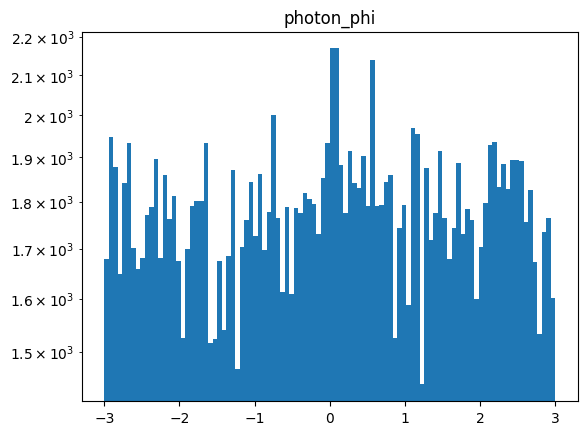

In [14]:
pfrel = np.array(ak.flatten(photons.phi))
np.save("arr_pfrel.npy",pfrel)
plt.hist(pfrel,bins=100,range=(-3,3))
plt.yscale("log")
plt.title("photon_phi")
plt.savefig("phi.pdf")
plt.show()

In [15]:
tag_cut  = ((photons.pt > 40) & (photons.pixelSeed == 1) & (photons.mvaID > 0.6) & (photons.pfRelIso03_chg_quadratic < 0.3) & (photons.pt * photons.pfRelIso03_chg_quadratic < 20))

In [16]:
tag_photons = photons[tag_cut]

In [17]:
probe_photon = photons

In [18]:
tnp = ak.cartesian({"tag": tag_photons, "probe" : probe_photon})
ak.count(tnp.tag.pt, axis = 1)

<Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 1, 0, 0, 1, 0, 0, 0] type='235637 * int64'>

In [19]:
tag_photons.pt

<Array [[], [], [], [], ..., [41], [], [], []] type='235637 * var * float32'>

In [20]:
tnp.tag.pt

<Array [[], [], [], [], ..., [41], [], [], []] type='235637 * var * float32'>

In [21]:
probe_photon.pt

<Array [[35.1], [48.1], ..., [], [42.3, 39.2]] type='235637 * var * float32'>

In [22]:
tnp1 = tnp[(ak.where(ak.count(tnp.probe.pt,axis=1)!=0))]

In [23]:
tnp1.probe.pt

<Array [[41.6], [42.7], [46.7], ..., [41.5], [41]] type='40426 * var * float32'>

In [24]:
momentum_vector_amp_tag = np.sqrt(np.square(np.sinh(tnp.tag.eta) * np.sqrt(np.square(tnp.tag.pt) + (0.5/1000)**2)) + np.square(tnp.tag.pt))

In [25]:
momentum_vector_amp_tag

<Array [[], [], [], [], ..., [160], [], [], []] type='235637 * var * float32'>

In [26]:
momentum_vector_amp_probe = np.sqrt(np.square(np.sinh(tnp.probe.eta) * np.sqrt(np.square(tnp.probe.pt) + (0.5/1000)**2)) + np.square(tnp.probe.pt))

In [27]:
np.abs(momentum_vector_amp_tag - momentum_vector_amp_probe) > 0.3

<Array [[], [], [], [], ..., [False], [], [], []] type='235637 * var * bool'>

In [28]:
tnp = tnp[np.abs(momentum_vector_amp_tag - momentum_vector_amp_probe) > 0.3]

In [29]:
tnp.probe.pt

<Array [[], [], [], [], [], ..., [], [], [], []] type='235637 * var * float32'>

In [30]:
tnp.probe.pt

<Array [[], [], [], [], [], ..., [], [], [], []] type='235637 * var * float32'>

In [31]:
mass = np.sqrt(2*np.sqrt(np.square(tnp.tag.pt) + (5e-4)**2)*np.sqrt(np.square(tnp.probe.pt) + (5e-4)**2)*(np.cosh(tnp.tag.eta - tnp.probe.eta) - np.cos(tnp.tag.phi - tnp.probe.phi)))

In [32]:
mass = ak.flatten(mass)
mass=np.array(mass)
np.save("arr_mass.npy",mass)

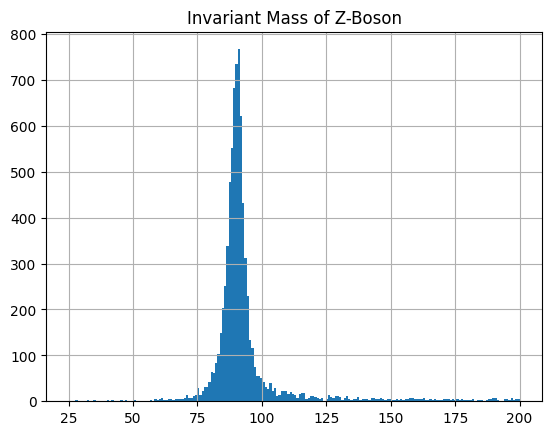

In [33]:
plt.hist(mass,bins=200,range= (25,200))
plt.title("Invariant Mass of Z-Boson")
plt.grid(True)
plt.savefig('z.pdf')
plt.show()


In [34]:
import ROOT as rt

Welcome to JupyROOT 6.28/04


In [35]:
pt = np.load('pt_arr.npy')
arr_mass = np.load('arr_mass.npy')
arr_phi = np.load('arr_pfrel.npy')
arr_eta = np.load('arr_mva.npy')

In [51]:
c1 = rt.TCanvas('c1','Example',200,10,700,500)
hist = rt.TH1F('Statistics','Mass of Z boson',100,55,115)
for i in range(len(arr_mass)):
    x = arr_mass[i]
    hist.Fill(x)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: Statistics (Potential memory leak).


In [52]:
hist.SetFillColor(rt.kGreen)
hist.GetXaxis().SetTitle("X axis")
hist.GetYaxis().SetTitle("Y axis")

In [53]:
c1.SetTickx()
c1.SetTicky()
c1.SetGridx()
c1.SetGridy()

In [54]:
hist.Draw()
c1.Update()

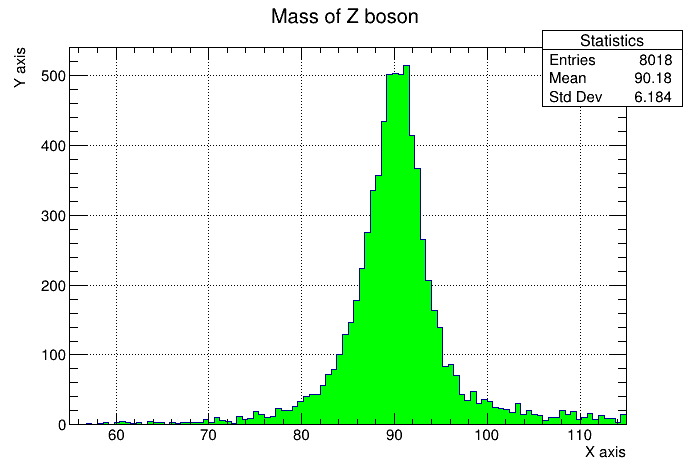

In [55]:
c1.Draw()

In [56]:
histfile = rt.TFile.Open("histfile1.root","recreate")

In [57]:
histfile.WriteObject(hist,"histogram")

869